## Imports

In [2]:
# ONLY RUN THIS ONCE
%load_ext autoreload
%autoreload 2

import os
os.chdir(os.path.dirname(os.getcwd()))
!pwd

/home/omer/code/mareksherman/classipy


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

from datagen.data import Data
from datagen.gbq_data import GBQDataset


## Class Test

In [20]:
g = GBQDataset(n_datasets=20)
g.download_datasets();

/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1967: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  df[column] = pandas.Series(df[column], dtype=dtypes[column])


Getting DataFrame: bigquery-public-data.austin_bikeshare bikeshare_trips
Completed : {'bigquery-public-data.austin_bikeshare'} {'bikeshare_trips'}


/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1967: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  df[column] = pandas.Series(df[column], dtype=dtypes[column])


Getting DataFrame: bigquery-public-data.austin_crime crime
Completed : {'bigquery-public-data.austin_crime'} {'crime'}
Getting DataFrame: bigquery-public-data.census_bureau_usa population_by_zip_2010
Completed : {'bigquery-public-data.census_bureau_usa'} {'population_by_zip_2010'}
Getting DataFrame: bigquery-public-data.census_bureau_international birth_death_growth_rates
Completed : {'bigquery-public-data.census_bureau_international'} {'birth_death_growth_rates'}
Getting DataFrame: bigquery-public-data.census_bureau_international midyear_population_5yr_age_sex
Completed : {'bigquery-public-data.census_bureau_international'} {'midyear_population_5yr_age_sex'}
Getting DataFrame: bigquery-public-data.census_bureau_international mortality_life_expectancy
Completed : {'bigquery-public-data.census_bureau_international'} {'mortality_life_expectancy'}
Getting DataFrame: bigquery-public-data.covid19_geotab_mobility_impact airport_traffic
Completed : {'bigquery-public-data.covid19_geotab_mobili

/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Getting DataFrame: bigquery-public-data.covid19_geotab_mobility_impact us_border_volumes
Completed : {'bigquery-public-data.covid19_geotab_mobility_impact'} {'us_border_volumes'}


/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Getting DataFrame: bigquery-public-data.covid19_nyt excess_deaths
Completed : {'bigquery-public-data.covid19_nyt'} {'excess_deaths'}


/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Getting DataFrame: bigquery-public-data.covid19_nyt mask_use_by_county
Completed : {'bigquery-public-data.covid19_nyt'} {'mask_use_by_county'}
Getting DataFrame: bigquery-public-data.fda_drug drug_enforcement


/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Completed : {'bigquery-public-data.fda_drug'} {'drug_enforcement'}
Getting DataFrame: bigquery-public-data.geo_us_boundaries adjacent_counties
Completed : {'bigquery-public-data.geo_us_boundaries'} {'adjacent_counties'}
Getting DataFrame: bigquery-public-data.geo_us_boundaries states


/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Completed : {'bigquery-public-data.geo_us_boundaries'} {'states'}
Getting DataFrame: bigquery-public-data.google_ads geotargets
Completed : {'bigquery-public-data.google_ads'} {'geotargets'}


In [19]:
gbq_df = pd.read_csv('raw_data/gbq_data.csv')
print(gbq_df.shape)
gbq_df

(9, 14)


,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,n_values,mean,std,median,skew,kurt,shapiro_wilk_test
0,bigquery-public-data.austin_bikeshare,bikeshare_trips,trip_id,NaN,"['9900118221, 9900194943, 18217320, 9900326720...",[9900118221 9900194943 18217320 9900326720 ...,1000,1000,2359643065.267,4204668692.1490617,18792288.5,1.238799,-0.466311,1.401298e-45
1,bigquery-public-data.austin_bikeshare,bikeshare_trips,subscriber_type,NaN,"['Local365, Local30, Walk Up, Explorer, Local3...",['Local365' 'Local30' 'Walk Up' 'Explorer' 'U....,32,1000,NaN,NaN,NaN,NaN,NaN,NaN
2,bigquery-public-data.austin_bikeshare,bikeshare_trips,bikeid,NaN,"['262, 576, 344, 260, 21427, 152, 961, 034G, 4...",['262' '576' '344' '260' '21427' '152' '961' '...,551,1000,NaN,NaN,NaN,NaN,NaN,NaN
3,bigquery-public-data.austin_bikeshare,bikeshare_trips,start_time,NaN,"['2021-04-27 22:46:56+00:00, 2018-12-26 15:44:...","<DatetimeArray>\n['2021-04-27 22:46:56+00:00',...",997,1000,2017-10-10 16:06:55.107000064+00:00,744 days 07:43:07.298628464,2018-02-04 00:52:41.500000+00:00,NaN,NaN,NaN
4,bigquery-public-data.austin_bikeshare,bikeshare_trips,start_station_id,NaN,"['3377.0, 3841.0, 3798.0, 2542.0, 3660.0, 3619...",[3377. 3841. 3798. 2542. 3660. 3619. 2494. 257...,87,1000,2957.532044760936,594.3952760032842,2570.0,0.427088,-0.697185,1.000000e+00
5,bigquery-public-data.austin_bikeshare,bikeshare_trips,start_station_name,NaN,"['MoPac Pedestrian Bridge @ Veterans Drive, Gu...",['MoPac Pedestrian Bridge @ Veterans Drive' 'G...,141,1000,NaN,NaN,NaN,NaN,NaN,NaN
6,bigquery-public-data.austin_bikeshare,bikeshare_trips,end_station_id,NaN,"['2501, 3794, 2499, 2568, 2564, 2542, 2574, 25...",['2501' '3794' '2499' '2568' '2564' '2542' '25...,89,1000,NaN,NaN,2567.0,0.557541,-0.244959,NaN
7,bigquery-public-data.austin_bikeshare,bikeshare_trips,end_station_name,NaN,"['City Hall / Lavaca & 2nd, 22nd/Pearl, Lakesh...",['City Hall / Lavaca & 2nd' '22nd/Pearl' 'Lake...,127,1000,NaN,NaN,NaN,NaN,NaN,NaN
8,bigquery-public-data.austin_bikeshare,bikeshare_trips,duration_minutes,NaN,"['43, 18, 24, 21, 29, 2, 12, 17, 22, 4, 17, 6,...",[ 43 18 24 21 29 2 12 17 22 ...,133,1000,32.337,81.80672203902789,13.0,7.525550,68.170924,0.000000e+00


In [6]:
pd.read_csv('raw_data/combined_data.csv')

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,mean,std,median,skew,kurt,shapiro_wilk_test
0,bigquery-public-data.austin_bikeshare,bikeshare_trips,trip_id,NaN,"['10484691, 9900031869, 12460390, 9900000104, ...",[ 10484691 9900031869 12460390 9900000104 ...,1000,2744825634.11,4420116116.340697,18790423.5,1.003704,-0.994569,1.961818e-44
1,bigquery-public-data.austin_bikeshare,bikeshare_trips,subscriber_type,NaN,"['Local365, Local31, Local30, U.T. Student Mem...",['Local365' 'Local31' 'Local30' 'U.T. Student ...,26,NaN,NaN,NaN,NaN,NaN,NaN
2,bigquery-public-data.austin_bikeshare,bikeshare_trips,bikeid,NaN,"['544, 663, 417, 956, 298, 80, 664, 2232, 28, ...",['544' '663' '417' '956' '298' '80' '664' '223...,542,NaN,NaN,NaN,NaN,NaN,NaN
3,bigquery-public-data.austin_bikeshare,bikeshare_trips,start_time,NaN,"['2015-05-18 10:12:00+00:00, 2021-04-18 13:43:...","<DatetimeArray>\n['2015-05-18 10:12:00+00:00',...",997,2017-08-04 05:59:58.782000128+00:00,726 days 20:24:11.697603776,2017-10-07 18:55:04.500000+00:00,NaN,NaN,NaN
4,bigquery-public-data.austin_bikeshare,bikeshare_trips,start_station_id,NaN,"['2495.0, 2567.0, 2707.0, 2494.0, 3798.0, 4057...",[2495. 2567. 2707. 2494. 3798. 4057. nan 379...,88,2943.229979466119,604.3258893674106,2571.0,0.323263,-0.364234,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,fernandol/countries-of-the-world,/home/omer/code/mareksherman/classipy/raw_data...,Birthrate,NaN,"['46,6, 15,11, 17,14, 22,46, 8,71, 45,11, 14,1...","['46,6' '15,11' '17,14' '22,46' '8,71' '45,11'...",220,NaN,NaN,NaN,NaN,NaN,NaN
191,fernandol/countries-of-the-world,/home/omer/code/mareksherman/classipy/raw_data...,Deathrate,NaN,"['20,34, 5,22, 4,61, 3,27, 6,25, 24,2, 5,34, 5...","['20,34' '5,22' '4,61' '3,27' '6,25' '24,2' '5...",201,NaN,NaN,NaN,NaN,NaN,NaN
192,fernandol/countries-of-the-world,/home/omer/code/mareksherman/classipy/raw_data...,Agriculture,NaN,"['0,38, 0,232, 0,101, nan, nan, 0,096, 0,04, 0...","['0,38' '0,232' '0,101' nan '0,096' '0,04' '0,...",150,NaN,NaN,NaN,NaN,NaN,NaN
193,fernandol/countries-of-the-world,/home/omer/code/mareksherman/classipy/raw_data...,Industry,NaN,"['0,24, 0,188, 0,6, nan, nan, 0,658, 0,18, 0,2...","['0,24' '0,188' '0,6' nan '0,658' '0,18' '0,22...",155,NaN,NaN,NaN,NaN,NaN,NaN


## DO NOT TOUCH!

In [199]:
dataset_name = "bigquery-public-data.austin_crime.crime"
dataset_rows = [get_row(crime_df[col_name],dataset_name) for col_name in crime_df]
output_dataset = pd.concat(dataset_rows, axis=0).reset_index(drop=True)
output_dataset.head(10)
    

,dataset_name,column_name,column_values,nunique_values,mean,std,median,shapiro_wilk_test,label
0,bigquery-public-data.austin_crime.crime,unique_key,"20145040798.0, 20155003516.0, 20151881192.0, 2...",1000,1.770501e+10,6.230494e+09,2.015214e+10,0.0,NaN
1,bigquery-public-data.austin_crime.crime,address,"1715 W CESAR CHAVEZ ST Austin, TX 78703 (30.27...",888,NaN,NaN,NaN,NaN,NaN
2,bigquery-public-data.austin_crime.crime,census_tract,"18.21, 24.28, 23.07, 6.04, 18.39, 18.4, 12.0, ...",178,8.352951e+01,7.595945e+02,1.819000e+01,1.0,NaN
3,bigquery-public-data.austin_crime.crime,clearance_date,"2015-05-21 12:00:00+00:00, 2014-05-29 12:00:00...",569,NaN,NaN,NaN,NaN,NaN
4,bigquery-public-data.austin_crime.crime,clearance_status,"Not cleared, Not cleared, Not cleared, Not cle...",3,NaN,NaN,NaN,NaN,NaN
5,bigquery-public-data.austin_crime.crime,council_district_code,"1.0, 4.0, 1.0, 2.0, 4.0, 5.0, 4.0, 7.0, 3.0, 3...",10,5.297679e+00,2.852464e+00,5.000000e+00,1.0,NaN
6,bigquery-public-data.austin_crime.crime,description,"BURGLARY NON RESIDENCE , BURG NON RESID...",30,NaN,NaN,NaN,NaN,NaN
7,bigquery-public-data.austin_crime.crime,district,"B, D, F, E, I, B, I, E, A, F, G, D, D, C, G, F...",11,NaN,NaN,NaN,NaN,NaN
8,bigquery-public-data.austin_crime.crime,latitude,"30.23763, nan, nan, nan, 30.264273, nan, 30.26...",270,3.029117e+01,7.353777e-02,3.027568e+01,1.0,NaN
9,bigquery-public-data.austin_crime.crime,longitude,"nan, nan, nan, -97.83889, nan, nan, -97.739377...",266,-9.773527e+01,4.765600e-02,-9.772925e+01,1.0,NaN


## Shapiro Value > 0.5 indicates Normality

/home/omer/.pyenv/versions/3.8.12/envs/classipy/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

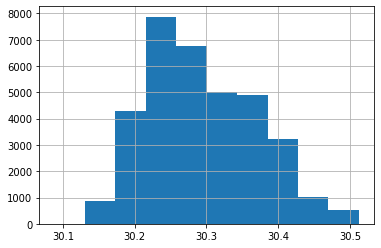

In [197]:
crime_df.latitude.hist()
shapiro(crime_df.latitude)
